In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
from tqdm import tqdm

In [2]:

l = 10 # lengthscale of the domain 
k = 1 # any k 
f = k/l # k - integer

beta_max = 1.0
beta_range = 0.5

sigma_max = 0.5
sigma_range = -0.25

b = 2

def trunc_sin(v):
    return np.sqrt((1+b**2)/((1+(b**2)*(np.sin(v))**2)))*np.sin(v)

def beta_value(x,y):
    return beta_max*np.logaddexp(0,beta_range*trunc_sin(2*np.pi*f*x) * trunc_sin(2*np.pi*f*y))
    
def sigma_value(x,y):
    return sigma_max*np.logaddexp(0,sigma_range*trunc_sin(2*np.pi*f*x) * trunc_sin(2*np.pi*f*y))


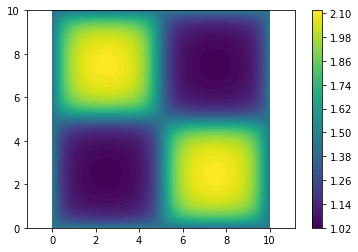

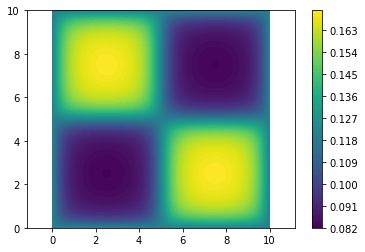

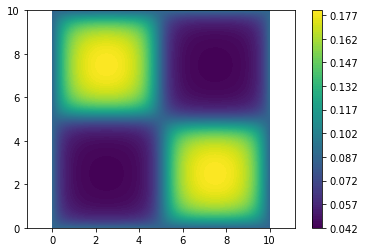

In [3]:

N=100
xp = np.linspace(0,l,N)
yp = np.linspace(0,l,N)


xx, yy = np.meshgrid(xp, yp, sparse=False)

beta_grid = np.zeros((N,N))
sigma_grid = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        beta_grid[i,j]=beta_value(xp[i],yp[j])
        sigma_grid[i,j]=sigma_value(xp[i],yp[j])

plt.contourf(xx,yy,beta_grid**-1,levels=100)
plt.axis('equal')
plt.colorbar()
plt.show()

plt.contourf(xx,yy,sigma_grid**2,levels=100)
plt.axis('equal')
plt.colorbar()
plt.show()

plt.contourf(xx,yy,(sigma_grid**2)/(2*beta_grid),levels=100)
plt.axis('equal')
plt.colorbar()
plt.show()


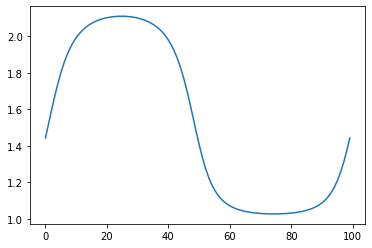

In [4]:
plt.plot(beta_grid[75]**-1)

In [166]:
dt = 0.05
T = np.arange(0,10*5000,dt)

skip=10

n = len(T)
npb = 500 # number of points inside batches.
nb = int(len(T)/(npb))
x = np.zeros(n)
y = np.zeros(n)
beta = np.zeros(n)
sigma = np.zeros(n)

v_warmup=10

x[0]=np.random.uniform(l)
y[0]=np.random.uniform(l)

vx=0
vy=0
for i in tqdm(range(1,n)):
    
    beta[i]  = beta_value(x[i-1],y[i-1])
    sigma[i] = sigma_value(x[i-1],y[i-1])
    
    
    vx = vx - (beta[i]*vx * dt)  + (sigma[i] *np.random.randn(1)* np.sqrt(dt))
    vy = vy - (beta[i]*vy * dt)  + (sigma[i] *np.random.randn(1)* np.sqrt(dt))
    x[i] = x[i-1] + vx*dt 
    y[i] = y[i-1] + vy*dt
    
    # instead of skipping data between batches we randomise 
    # the location of the individual after npb timesteps
    if i%(npb*skip)==0:
        x[i]=np.random.uniform(l)
        y[i]=np.random.uniform(l)
        
        vx=0
        vy=0
        
        beta_w  = beta_value(x[i],y[i])
        sigma_w = sigma_value(x[i],y[i])
        for j in range(v_warmup):
            vx = vx - (beta_w*vx * dt)  + (sigma_w *np.random.randn(1)* np.sqrt(dt))
            vy = vy - (beta_w*vy * dt)  + (sigma_w *np.random.randn(1)* np.sqrt(dt))
    
x=x[::skip]
y=y[::skip]
T=T[::skip]
beta=beta[::skip]
sigma=sigma[::skip]

100%|██████████| 999999/999999 [01:48<00:00, 9242.20it/s]


In [167]:
obs_error =0.005 # gps observation error
x = x + np.random.normal(0, obs_error, n//skip)
y = y + np.random.normal(0, obs_error, n//skip)

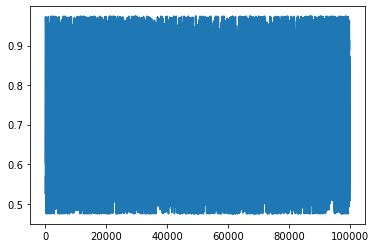

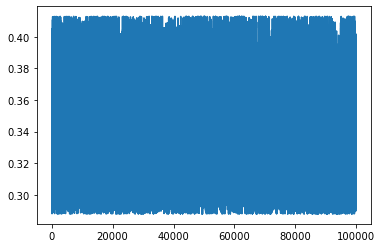

In [168]:
plt.plot(beta[1:])
plt.show()
plt.plot(sigma[1:])
plt.show()

In [169]:
dataset = pd.DataFrame({'Time':T, 'Latitude':x,'Longitude':y,'Beta':beta,'Sigma':sigma,'ID':0})

In [170]:
# set the IDs according to the batches

for j in tqdm(range(nb)):
    dataset['ID'].iloc[j*npb:(j+1)*npb]= j
    

  0%|          | 0/2000 [00:00<?, ?it/s]/maths/ctorney/anaconda3/envs/tf_pre/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
100%|██████████| 2000/2000 [00:01<00:00, 1509.66it/s]


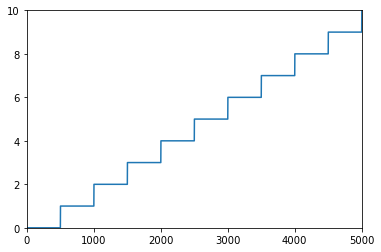

In [171]:
plt.plot(dataset.ID)
plt.xlim(0,5000)
plt.ylim(0,10)
plt.show()

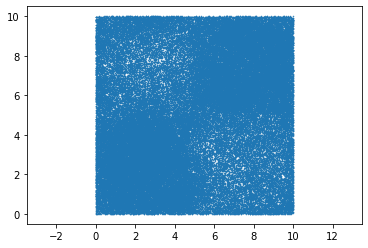

In [172]:
X = dataset[['Latitude','Longitude']].values
plt.plot(X[:,0]%10,X[:,1]%10,'.',markersize=1)
plt.axis('equal')
plt.show()

In [173]:
dataset.to_csv('../data/synthetic_data/positions_b' + str(int(b)) + '.csv')


In [84]:
X.shape

(20000, 2)

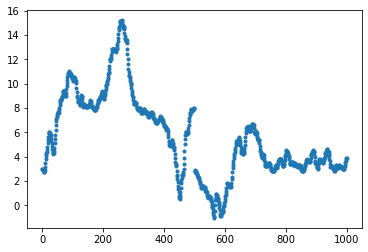

In [85]:
plt.plot(X[:1000:1,0],'.')

In [72]:
np.linspace(0, 10, 20,endpoint=False)

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [75]:
2**6


64